In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Projects/Feynn/Cheapestelectriccars-EVDatabase.csv')
df.shape

(180, 11)

In [4]:
df

,Name,Subtitle,Acceleration,TopSpeed,Range,Efficiency,FastChargeSpeed,Drive,NumberofSeats,PriceinGermany,PriceinUK
0,Opel Ampera-e,Battery Electric Vehicle | 58 kWh,7.3 sec,150 km/h,335 km,173 Wh/km,210 km/h,Front Wheel Drive,5,"€42,990",NaN
1,Renault Kangoo Maxi ZE 33,Battery Electric Vehicle | 31 kWh,22.4 sec,130 km/h,160 km,194 Wh/km,-,Front Wheel Drive,5,NaN,"£31,680"
2,Nissan Leaf,Battery Electric Vehicle | 36 kWh,7.9 sec,144 km/h,220 km,164 Wh/km,230 km/h,Front Wheel Drive,5,"€29,990","£25,995"
3,Audi e-tron Sportback 55 quattro,Battery Electric Vehicle | 86.5 kWh,5.7 sec,200 km/h,375 km,231 Wh/km,600 km/h,All Wheel Drive,5,NaN,"£79,900"
4,Porsche Taycan Turbo S,Battery Electric Vehicle | 83.7 kWh,2.8 sec,260 km/h,390 km,215 Wh/km,860 km/h,All Wheel Drive,4,"€186,336","£138,830"
...,...,...,...,...,...,...,...,...,...,...,...
175,MG Marvel R,Battery Electric Vehicle | 65 kWh,7.9 sec,200 km/h,340 km,191 Wh/km,390 km/h,Rear Wheel Drive,5,"€40,000",NaN
176,Tesla Model 3 Long Range Dual Motor,Battery Electric Vehicle | 76 kWh,4.4 sec,233 km/h,490 km,155 Wh/km,820 km/h,All Wheel Drive,5,"€53,560",NaN
177,MG MG5 EV Long Range,Battery Electric Vehicle | 57 kWh,7.7 sec,185 km/h,340 km,168 Wh/km,340 km/h,Front Wheel Drive,5,NaN,"£26,495"
178,Audi Q4 e-tron 45 quattro,Battery Electric Vehicle | 76.6 kWh,6.9 sec,180 km/h,385 km,199 Wh/km,470 km/h,All Wheel Drive,5,"€50,900",NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Name             180 non-null    object
 1   Subtitle         180 non-null    object
 2   Acceleration     180 non-null    object
 3   TopSpeed         180 non-null    object
 4   Range            180 non-null    object
 5   Efficiency       180 non-null    object
 6   FastChargeSpeed  180 non-null    object
 7   Drive            180 non-null    object
 8   NumberofSeats    180 non-null    int64 
 9   PriceinGermany   168 non-null    object
 10  PriceinUK        136 non-null    object
dtypes: int64(1), object(10)
memory usage: 15.6+ KB


In [6]:
df.columns

Index(['Name', 'Subtitle', 'Acceleration', 'TopSpeed', 'Range', 'Efficiency',
       'FastChargeSpeed', 'Drive', 'NumberofSeats', 'PriceinGermany',
       'PriceinUK'],
      dtype='object')

In [7]:
df.Name.nunique()

174

In [8]:
# Data cleaning
df=df.fillna('0')

PriceinUK=[]
for item in df['PriceinUK']:
    PriceinUK+=[int(item.replace('£','').replace(',',''))]
df['PriceinUK']=PriceinUK

PriceinGermany=[]
for item in df['PriceinGermany']:
    PriceinGermany+=[int(item.replace('€','').replace(',',''))]
df['PriceinGermany']=PriceinGermany

FastChargeSpeed=[]
for item in df['FastChargeSpeed']:
    FastChargeSpeed+=[int(item.replace(' km/h','').replace('-','0'))]
df['FastChargeSpeed']=FastChargeSpeed

Efficiency=[]
for item in df['Efficiency']:
    Efficiency+=[int(item.replace(' Wh/km',''))]
df['Efficiency']=Efficiency

TopSpeed=[]
for item in df['TopSpeed']:
    TopSpeed+=[int(item.replace(' km/h',''))]
df['TopSpeed']=TopSpeed

Acceleration=[]
for item in df['Acceleration']:
    Acceleration+=[float(item.replace(' sec',''))]
df['Acceleration']=Acceleration

Range=[]
for item in df['Range']:
    Range+=[int(item.replace(' km',''))]
df['Range']=Range

Subtitle=[]
for item in df['Subtitle']:
    Subtitle+=[float(item.replace('Battery Electric Vehicle | ','').replace(' kWh','').replace('      ',''))]
df['Subtitle']=Subtitle

df= df.rename(columns = {'Subtitle':'KWH'})


In [9]:
df.head()


,Name,KWH,Acceleration,TopSpeed,Range,Efficiency,FastChargeSpeed,Drive,NumberofSeats,PriceinGermany,PriceinUK
0,Opel Ampera-e,58.0,7.3,150,335,173,210,Front Wheel Drive,5,42990,0
1,Renault Kangoo Maxi ZE 33,31.0,22.4,130,160,194,0,Front Wheel Drive,5,0,31680
2,Nissan Leaf,36.0,7.9,144,220,164,230,Front Wheel Drive,5,29990,25995
3,Audi e-tron Sportback 55 quattro,86.5,5.7,200,375,231,600,All Wheel Drive,5,0,79900
4,Porsche Taycan Turbo S,83.7,2.8,260,390,215,860,All Wheel Drive,4,186336,138830


<ipython-input-10-92a7a2c6e327>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

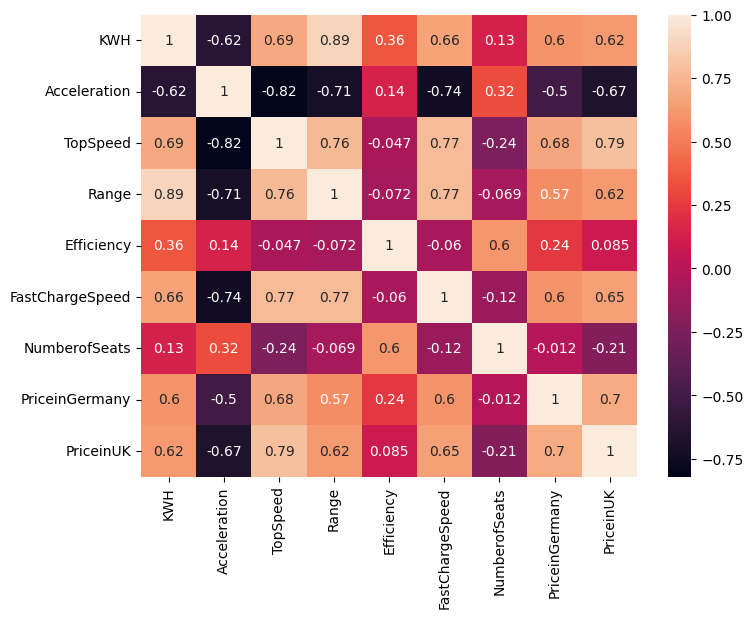

In [10]:
#Data Exploration
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True)

<Axes: xlabel='Drive', ylabel='count'>

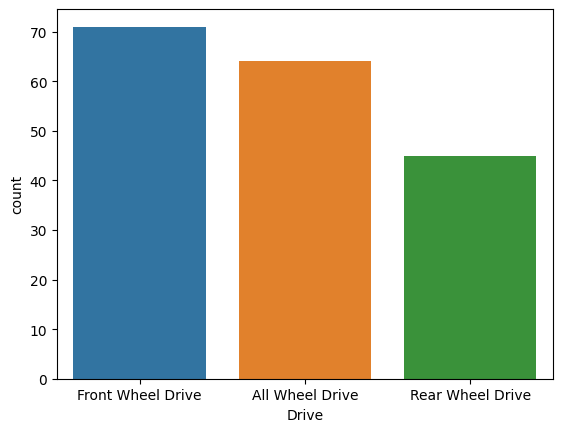

In [11]:
sns.countplot(x = 'Drive', data = df)

<Axes: xlabel='NumberofSeats', ylabel='count'>

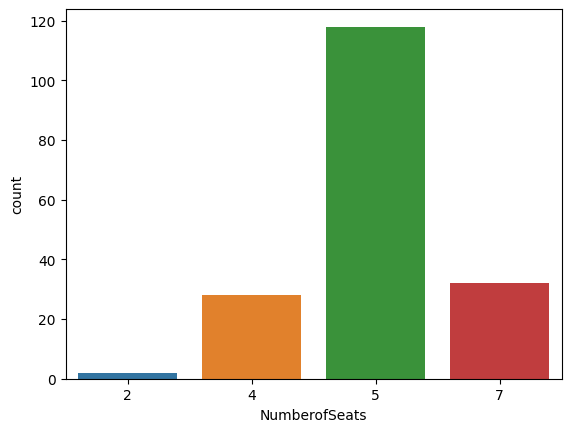

In [12]:
sns.countplot(x = 'NumberofSeats', data = df)

<Axes: xlabel='NumberofSeats', ylabel='count'>

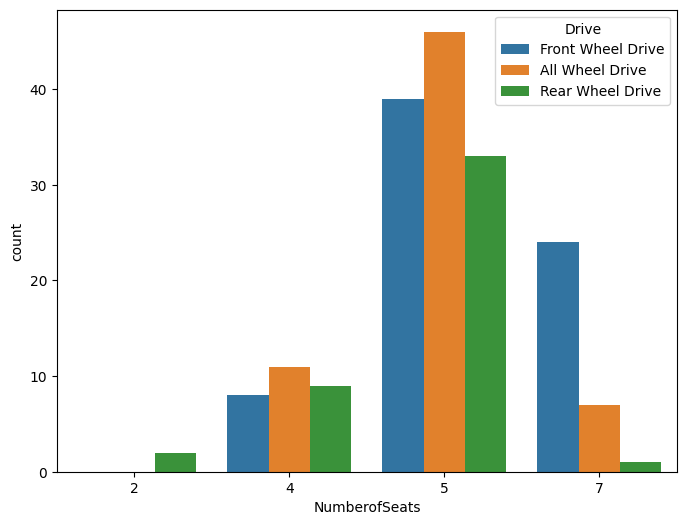

In [13]:
plt.figure(figsize=(8,6))
sns.countplot(x = 'NumberofSeats', hue='Drive', data=df)

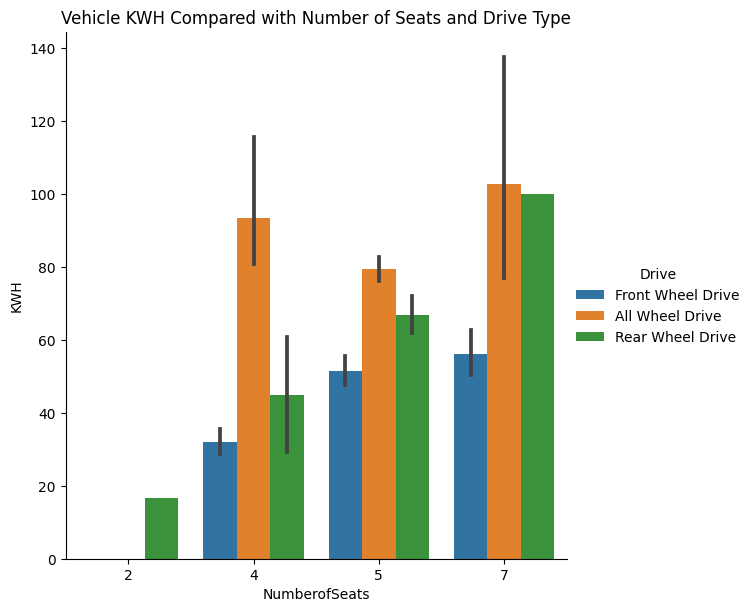

In [14]:
sns.catplot(data=df, kind="bar", x="NumberofSeats", y="KWH",height=6, hue="Drive")
plt.title("Vehicle KWH Compared with Number of Seats and Drive Type")
plt.show()

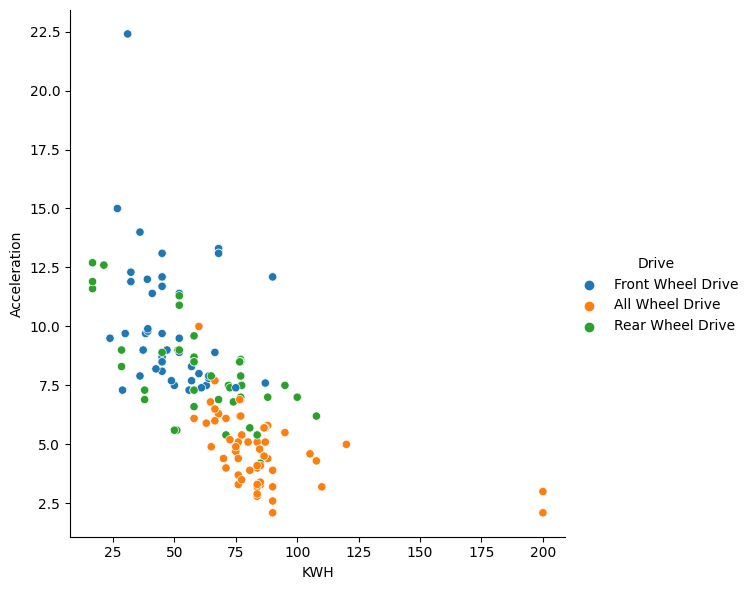

In [15]:
sns.relplot(x="KWH", y="Acceleration", height=6,hue="Drive",data=df)

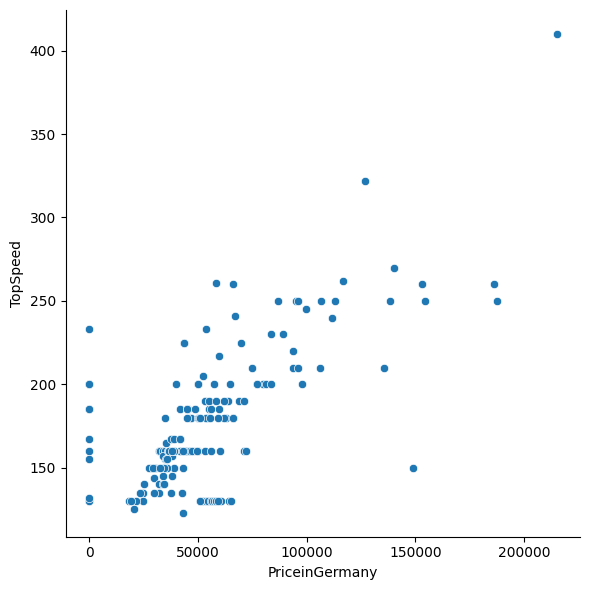

In [16]:
sns.relplot(x="PriceinGermany", y="TopSpeed", height=6,data=df)

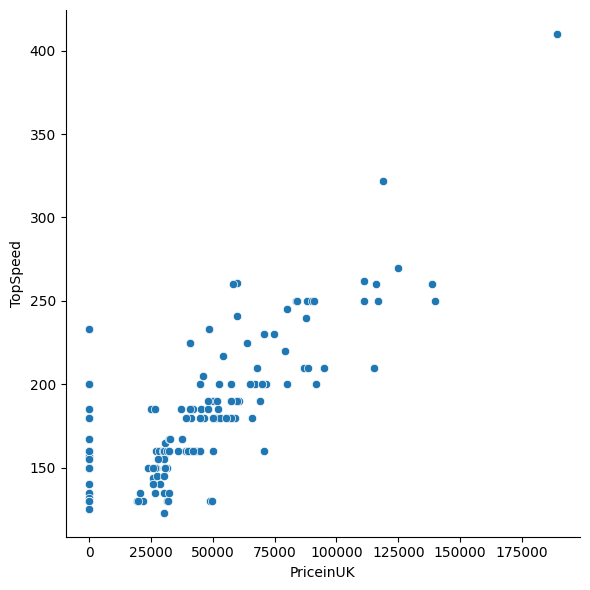

In [17]:
sns.relplot(x="PriceinUK", y="TopSpeed", height=6,data=df)

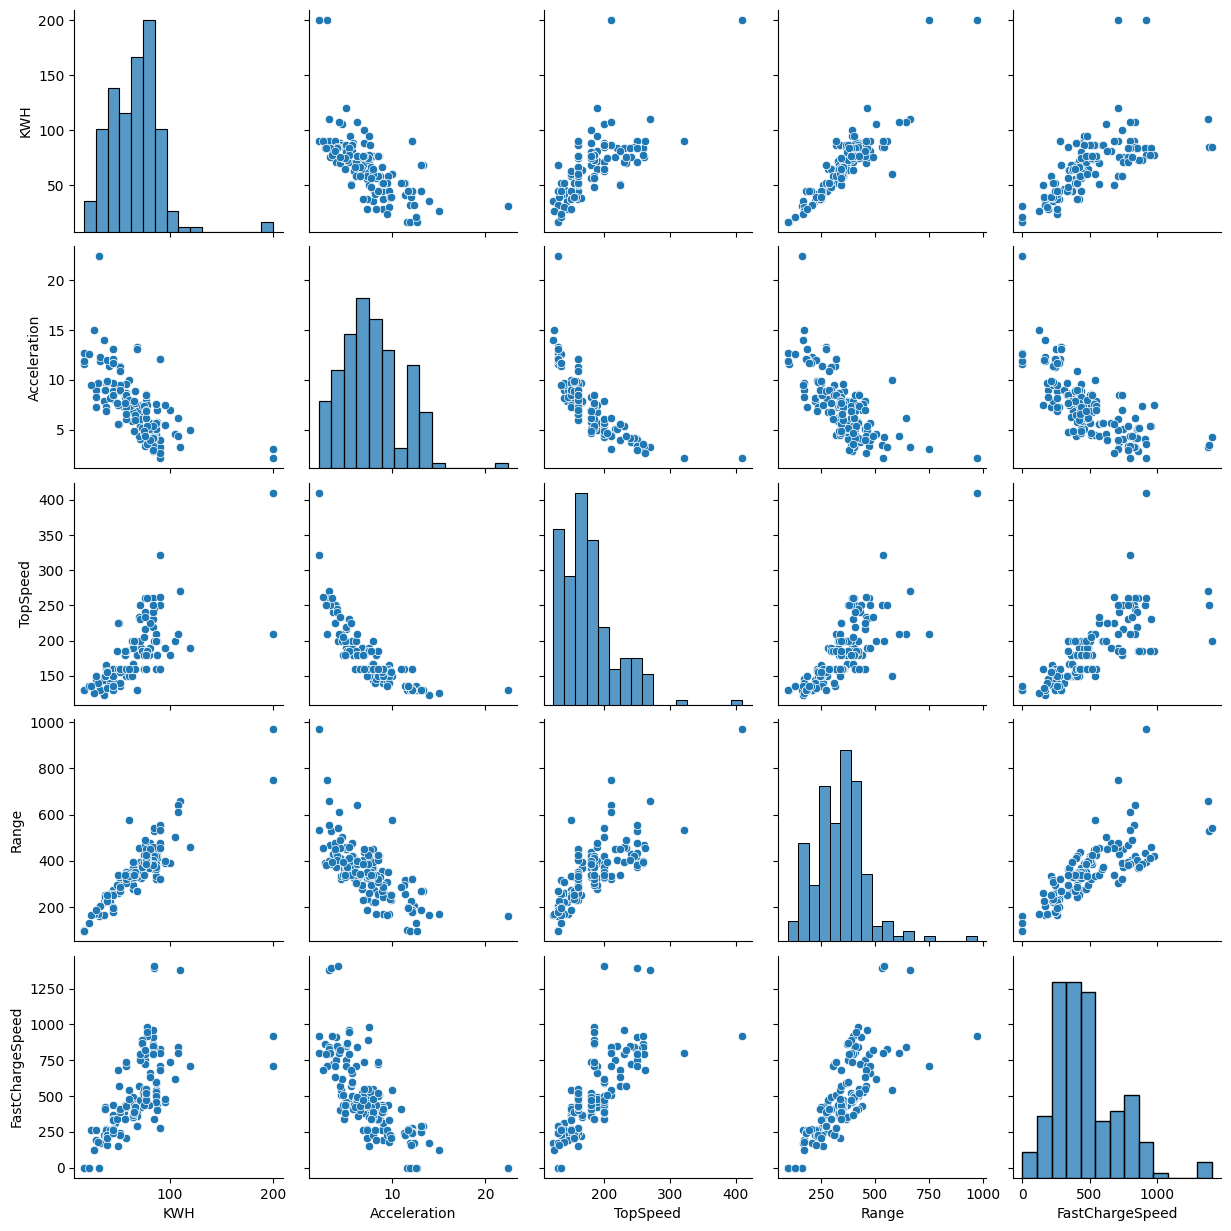

In [18]:
sns.pairplot(df[["KWH","Acceleration","TopSpeed","Range","FastChargeSpeed"]])

In [19]:
from sklearn.preprocessing import LabelEncoder
df = df.drop(['Name'], axis=1)
df['Drive'].unique()
drive_label = LabelEncoder()
df['Drive']=drive_label.fit_transform(df['Drive'])
df.head()


,KWH,Acceleration,TopSpeed,Range,Efficiency,FastChargeSpeed,Drive,NumberofSeats,PriceinGermany,PriceinUK
0,58.0,7.3,150,335,173,210,1,5,42990,0
1,31.0,22.4,130,160,194,0,1,5,0,31680
2,36.0,7.9,144,220,164,230,1,5,29990,25995
3,86.5,5.7,200,375,231,600,0,5,0,79900
4,83.7,2.8,260,390,215,860,0,4,186336,138830


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

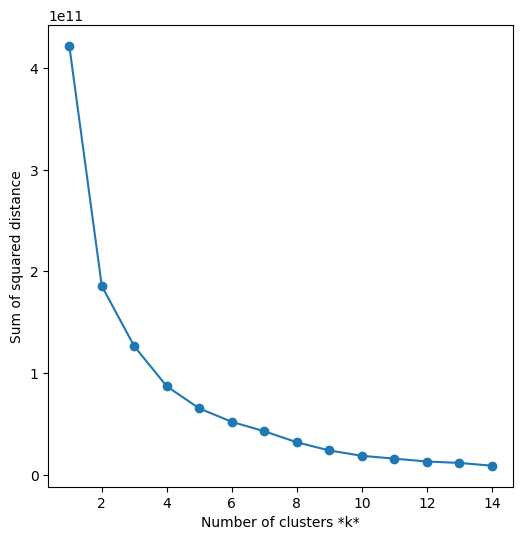

In [21]:
#Optimum k val
from sklearn.cluster import KMeans

sse = []
list_k = list(range(1, 15))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(df)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');

In [22]:
#Kmeans

kmeans = KMeans(n_clusters= 10)
kmeans.fit(df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=10)

In [26]:
labels = kmeans.labels_
df['Cluster'] = labels

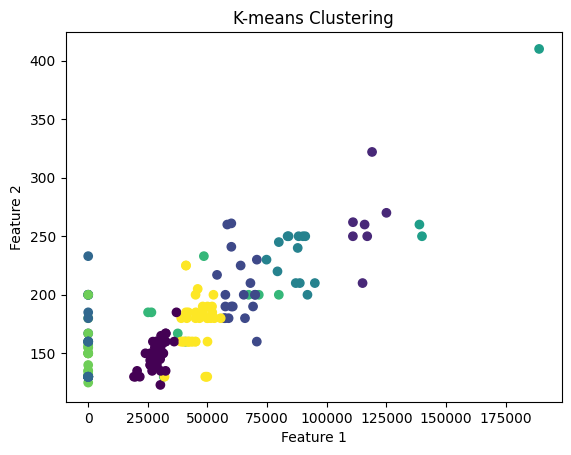

In [34]:
plt.scatter(df['PriceinUK'], df['TopSpeed'], c=df['Cluster'])
plt.title('K-means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()